In [1]:
import numpy as np

In [2]:
### 농어의 길이 데이터 (독립변수 : 특송, input data)
perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
### 농어의 무게 데이터 (농속변수 : target data)
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
### 훈련 및 테스트 데이터로 구분하기 : 비율 75:25
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
              train_test_split(perch_length, perch_weight,  
                               test_size=0.25, random_state=42)

In [4]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42,) (42,)
(14,) (14,)


In [5]:
### input 데이터는 2차원으로 만들기 : 변수명은 동일하게 사용
train_input = train_input.reshape(-1, 1) 
test_input = test_input.reshape(-1, 1) 

In [6]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42, 1) (42,)
(14, 1) (14,)


### 모델 훈련시키기

In [7]:
### 모델 생성하기 : 변수 knr, 이웃의 갯수는 3개

from sklearn.neighbors import KNeighborsRegressor

### 모델생성하기
knr = KNeighborsRegressor(n_neighbors=3) 
knr

KNeighborsRegressor(n_neighbors=3)

In [8]:
### 모델 훈련시키기 
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [9]:
### 훈련평가하기 : 변수명 train_score
train_score = knr.score(train_input, train_target) 
train_score 

0.9804899950518966

In [10]:
### 임의 데이터로 무게 예측하기
# 임의 데이터(길이) = 50
# - 임의 데이터(길이)는 독립변수(특성) 임
temp_input = [[50]] 
temp_pred  = knr.predict(temp_input)
temp_pred[0] 

1033.3333333333333

In [11]:
### 시각화

In [12]:
### 50cm 길이의 농어의 이웃 데이터 3개 확인하기
# - 가장 가까운 이웃 3개 추출
# - 이웃의 거리와 인덱스 위치 확인
distances, indexes = knr.kneighbors([[50]])
distances, indexes

(array([[6., 7., 7.]]), array([[34,  8, 14]], dtype=int64))

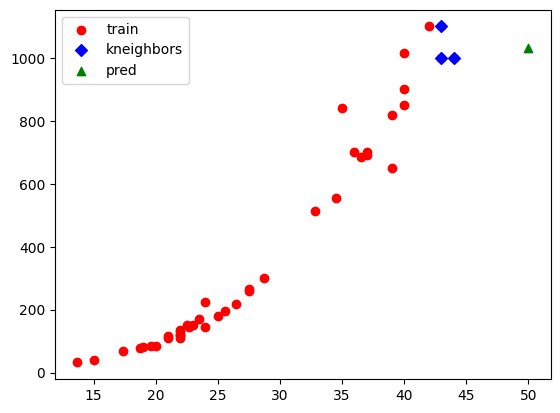

In [13]:
### 시각화 하기
# - 훈련데이터를 이용해서 scatter 그리기
# - 이웃의 위치데이터를 이용해서 scatter 그리기
# - 50cm 농어의 예측 데이터 위치 scatter 그리기

import matplotlib.pyplot as plt

# - 훈련데이터 시각화
plt.scatter(train_input, train_target, c="red", label="train") 

# - 이웃데이터 3개 시각화
plt.scatter(train_input[indexes], train_target[indexes], c="blue", label="kneighbors", marker="D") 

# - 예측데이터 1개 시각화
plt.scatter(50, 1033, c="green", label="pred", marker="^") 


# - 범주 추가
plt.legend()

plt.show()

In [14]:
### KNN 의 회귀모델 예측은 이웃하는 갯수가 가지고 있는 종속변수(target) 값을
# - 평균한 값이 예측값으로 사용됩니다.
np.mean(train_target[indexes])

1033.3333333333333

In [15]:
### [문제] 길이 100일때 농어의 무게는?

In [16]:
knr.predict([[100]]) 

array([1033.33333333])

In [17]:
### 100cm 예측값의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])
distances, indexes

(array([[56., 57., 57.]]), array([[34,  8, 14]], dtype=int64))

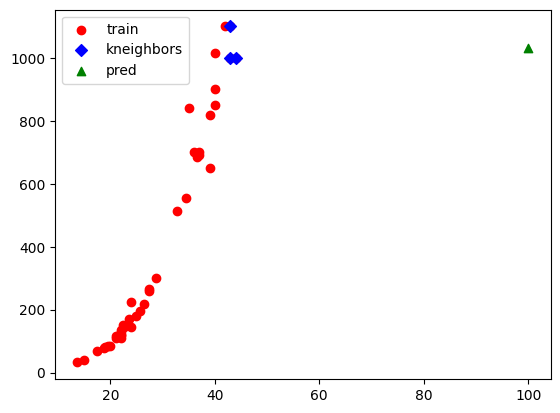

In [18]:
### 시각화 하기
# - 훈련데이터를 이용해서 scatter 그리기
# - 이웃의 위치데이터를 이용해서 scatter 그리기
# - 100cm 농어의 예측 데이터 위치 scatter 그리기

# import matplotlib.pyplot as plt

# - 훈련데이터 시각화
plt.scatter(train_input, train_target, c="red", label="train") 

# - 이웃데이터 3개 시각화
plt.scatter(train_input[indexes], train_target[indexes], c="blue", label="kneighbors", marker="D") 

# - 예측데이터 1개 시각화
plt.scatter(100, 1033, c="green", label="pred", marker="^") 


# - 범주 추가
plt.legend()

plt.show()

In [19]:
### KNN의 한계
# - x축(길이)의 크기가 커지더라도 이웃은 가까운것만 체크되기에
# - target값의 범위를 벗어나는 경우 모델로서 사용이 어려워짐
# - 다른 모델을 사용해야함

### 선형회귀(Linear Regression) 모델

In [20]:
### 선형회귀 모델 : 선형회귀, 다항회귀, 다중회귀 3가지 모델이 있음 
#   (선형회귀 : 직선방정식, 다항회귀 : 곡선방정식, 다중회귀 : 특성이 여러개인것)
# 다중회귀모델 중 : 특수한 모델로 릿지, 라쏘 모델이 사용됨

In [21]:
### 선형회귀모델
# - 훈련과정은 항상 동일 : 데이터분류 > 모델생성 > 훈련 > 평가 > 예측
# - 선형회귀는 비교적 간단하며, 성능은 뛰어남
# - 회귀모델 수행시 초반에 주로 사용됨(모델 비교를 위해서 사용됨)

### 선형회귀의 역할
# - "하나의 특성"을 가장 잘 나타내는 "직선"을 찾아내는 것

In [22]:
### 선형회귀모델 : LineatRegression 
from sklearn.linear_model import LinearRegression

In [23]:
### 사용중인 데이터 확인하기
print(train_input.shape, train_target.shape)

(42, 1) (42,)


In [24]:
### 모델 생성하기 : 변수명 lr 
lr = LinearRegression() 
lr

LinearRegression()

In [25]:
### 모델 훈련 시키기
lr.fit(train_input, train_target)

LinearRegression()

In [26]:
### 훈련데이터로 모델 평가하기
train_score = lr.score(train_input, train_target)
train_score

0.9398463339976041

In [27]:
### 테스트데이터로 모델 평가하기
test_score = lr.score(test_input, test_target)
test_score

0.824750312331356

In [28]:
### 50cm 길이의 농어 무게 예측하기
lr.predict([[50]]) 

array([1241.83860323])

In [29]:
### 하나의 직선을 그리기위한 1차 방정식
# y = a * x + b
# y : 종속변수(예측값)
# a = 기울기(coef)
# b = 절편(intercept)
# x = 독립변수(임의 길이)

In [30]:
### 모델이 훈련에 사용한 기울기와 절편 확인하기
# - 훈련모델의 수행 목적은 기울기와 절편을 스스로 알아내는 것임
# - 스스로 알아낸 기울기와 절편을 이용해서 학습을 수행합니다.

### 기울기
print(lr.coef_)

### y절편
print(lr.intercept_)

[39.01714496]
-709.0186449535474


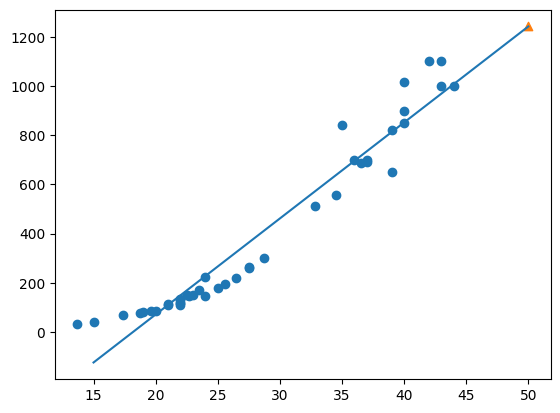

In [31]:
### 훈련데이터 scatter 그리기
### 50cm 농어 데이터의 위치 그래프에 표시하기

# - 훈련데이터 scatter 그리기
plt.scatter(train_input, train_target ) 

# - 50cm 농어 데이터의 위치 그래프에 표시하기
plt.scatter(50, 1241.839, marker="^") 


### 추세선 그리기
# - x축의 길이 범위를 15~50 으로 그리기
plt.plot([15, 50], [lr.coef_*15+lr.intercept_, lr.coef_*50+lr.intercept_])

plt.show()

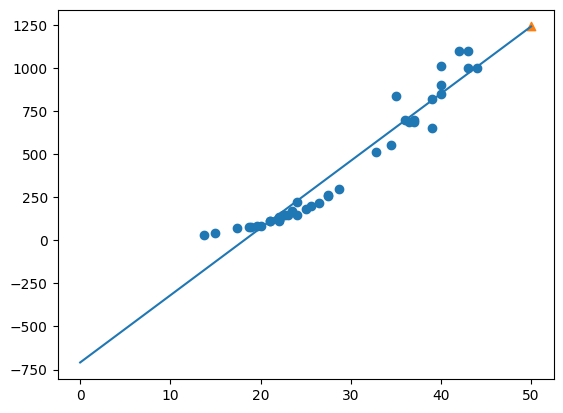

In [32]:
### 훈련데이터 scatter 그리기
### 50cm 농어 데이터의 위치 그래프에 표시하기

# - 훈련데이터 scatter 그리기
plt.scatter(train_input, train_target ) 

# - 50cm 농어 데이터의 위치 그래프에 표시하기
plt.scatter(50, 1241.839, marker="^") 


### 추세선 그리기
# - x축의 길이 범위를 15~50 으로 그리기
plt.plot([0, 50], [lr.coef_*0+lr.intercept_, lr.coef_*50+lr.intercept_])

plt.show()

In [33]:
### 선형회귀 모델 결과
# - y절편의 값이 음수(-)의 값을 나타내기에 
# - 작은 x값을 이용해서 예측할 경우 음수(-)값을 가지는 무게가 예측될 수 있음
# - 무게는 음수가 나올수 없기에,
# - 선형회귀(직선)모델 보다는 다른 모델을 이용해서 훈련할 필요성이 있음

### 산점도의 분포 중 좌하향에서 중간까지의 분포가 곡선을 나타내기에
# - 곡선을 나타내는 다항회귀모델을 사용해 봅니다.

### 다항회귀모델

In [34]:
### 2차방정식 = ax^2 + bx + c
# a 와 b : 계수라고 칭합니다.
# c : y절편

### 독립변수의 갯수 : 2개 필요 (x^2, x값)
# - 종속변수는 그대로 사용됨

In [35]:
3**2

9

In [36]:
### 2차원의 데이터형태를 유지하면서 컬럼(특성)을 추가할 때 사용하는 함수
np.column_stack((3**2, 3))

array([[9, 3]])

In [37]:
### 훈련 및 테스트 데이터를 2개의 열(특성)로 만들기
# 훈련 : trian_poly 변수 사용
# 테스트 : test_poly 변수 사용
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [38]:
print(train_poly.shape, test_poly.shape)

# (42, 2) --> 42행 2열

(42, 2) (14, 2)


In [39]:
### 모델 생성하기
# - 선형회귀, 다항회귀, 다중회귀의 모델은 하나의 모델(클래스)를 사용
# - 사용되는 데이터의 형태에 따라서 선형, 다항, 다중회귀로 분류됨
# - 모델(클래스)가 데이터의 형태에 따라서 알아서 훈련시킴

lr = LinearRegression()
lr

LinearRegression()

In [40]:
### 훈련시키기
lr.fit(train_poly, train_target)

LinearRegression()

In [41]:
### 훈련데이터를 이용해서 모델 평가하기
train_score = lr.score(train_poly, train_target)
train_score

0.9706807451768623

In [42]:
### 테스트데이터를 이용해서 모델 평가하기
test_score = lr.score(test_poly, test_target)
test_score

0.9775935108325122

In [43]:
### 테스트평가결과가 훈련평가결과보다 높게 나타남
# - 미미한 과소적합을 나타내고 있음

In [44]:
### 50cm 길이의 농어 무게 예측하기
lr.predict([[50**2, 50]])

array([1573.98423528])

In [45]:
### 2차 방정식의 계수 a, b와 절편 c의 값 추출하기

### 기울기
print("a = ", lr.coef_[0])
print("b = ", lr.coef_[1])

### y절편
print("c = ", lr.intercept_)

a =  1.0143321093767301
b =  -21.557924978837352
c =  116.0502107827827


In [46]:
a = lr.coef_[0]
b = lr.coef_[1]
c = lr.intercept_

In [47]:
### 예측이 적절한지 시각화로 확인하기
### 훈련 데이터 scatter() 그리기
### 50cm 농어 데이터 그리기

### 곡선(다항) 추세선(회귀선) 그리기 : x축의 범위는 15~50 까지

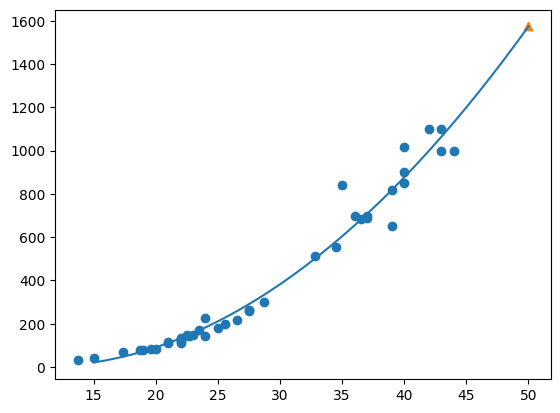

In [48]:
### 훈련데이터 scatter 그리기
### 50cm 농어 데이터의 위치 그래프에 표시하기 

# - 훈련데이터 scatter 그리기
plt.scatter(train_input, train_target ) 

# - 50cm 농어 데이터의 위치 그래프에 표시하기
plt.scatter(50, 1573.984, marker="^") 


### 곡선(다항) 추세선(회귀선) 그리기 : x축의 범위는 15~50 까지
# 추세선의 범위 : 15 ~ 50 까지의 범위값 만들기(리스트로 생성)
point = np.arange(15, 51)
plt.plot(point, (a*point**2)+(b*point)+c )

plt.show()

In [49]:
point = np.arange(15, 51)
point

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50])

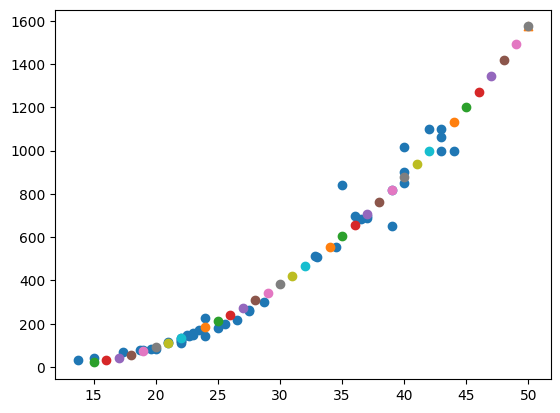

In [58]:
# 내가 해본거------------------------------잘안됨
### 훈련데이터 scatter 그리기
### 50cm 농어 데이터의 위치 그래프에 표시하기 

# - 훈련데이터 scatter 그리기
plt.scatter(train_input, train_target ) 

# - 50cm 농어 데이터의 위치 그래프에 표시하기
plt.scatter(50, 1573.984, marker="^") 


### 곡선(다항) 추세선(회귀선) 그리기 : x축의 범위는 15~50 까지
# 추세선의 범위 : 15 ~ 50 까지의 범위값 만들기(리스트로 생성)
for i in range(15, 51, 1) :
    fit = lr.coef_[0]*i**2+lr.coef_[1]*i+lr.intercept_  
    plt.scatter(i, fit) 
    plt.plot(i, fit) 
        
plt.show()
#-------------------------------------------------

In [51]:
### (해석)
# - 전체적으로 선형회귀보델보다는 다항회귀모델의 평가결과가 높게 나옴
# - 그러나, 훈련에 대한 평가결과가 테스트 결과보다 낮게나옴(과소적합 발생)
# - 큰 차이를 보이지 않는 경우에는 분석가에 따라 그대로 사용하는 경우도 있음
# - 과소적합을 해소하기 위해서는 데이터를 늘리거나, 복잡도를 높이는 방법 사용

### (데이터 늘리기)
# 데이터가 많고 적음의 의미
# - 데이터는 행으로 많은 경우 많은 데이터라고 알고 있음
# - 그러나, 컬럼(특성)이 많은 경우에도 데이터가 많다고 표현합니다.
# - 행의 데이터는 한계가 있음
# - 데이터의 양을 늘려서 복잡도를 높이는 방법중에 특성(컬럼)을 늘리는 경우도
#   사용됨(이때 사용되는 방법 : 특성공학의 개념이 사용됨)
# - 독립변수의 갯수(특성의 갯수)를 늘려서 복잡도를 높이는 방법 사용

### 다중회귀모델 : 특성이 많은 경우 사용되는 모델